In [3]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split as tts
import pickle

In [9]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 38 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,"7 days, 18 hours and 25 minutes"
H2O_cluster_name:,H2O_from_python_pomilusky_uk74x7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.287 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [7]:
df = pd.read_csv('../Data/new_train.csv')
train, test = tts(df, test_size=0.2, train_size= 0.8, random_state = 7)
testing = test
train, test = tts(train, test_size=0.2, train_size= 0.8, random_state = 7)


In [10]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [13]:
#help(H2OAutoML)

In [12]:
X =train.columns
y = 'price'
X.remove(y)
aml=H2OAutoML(max_models=4,seed=1)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_5_20220224_121844

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2327.5848870938994
RMSE: 48.245050389588144
MAE: 19.997375526823262
RMSLE: 0.23135915678806024
R^2: 0.8273729473639215
Mean Residual Deviance: 2327.5848870938994
Null degrees of freedom: 2419
Residual degrees of freedom: 2416
Null deviance: 32629621.723553635
Residual deviance: 5632755.426767237
AIC: 25638.921781941957

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 4838.038238811319
RMSE: 69.5560079275063
MAE: 31.145988781742396
RMSLE: NaN
R^2: 0.641183319956421
Mean Residual Deviance: 4838.038238811319
Null degrees of freedom: 2419
Residual degrees of freedom: 2416
Null deviance: 32653376.11143731
Residual dev

In [16]:
testing = h2o.H2OFrame(testing)
pred = aml.leader.predict(testing).as_data_frame()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/home/pomilusky/miniconda3/envs/ironhack/lib/python3.8/site-packages/h2o/job.py:83: UserWarning: Test/Validation dataset column 'host_neighbourhood' has levels not trained on: ["Trevi"]
  warnings.warn(w)


In [19]:
testing = testing.as_data_frame()
testing['pred'] = pred

In [21]:
testing[['price','pred']].head()

,price,pred
0,120,156.640101
1,55,55.685116
2,175,156.008513
3,75,54.145403
4,150,149.910569


In [33]:
testing['di'] = testing.price - testing.pred
testing.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,tv,washer,lang_var,entire_home/apt,shared_room,room_pp,private,pred,diff,di
0,7,2,NaN,77.531057,0,Tuindorp Oostzaan,1,2,1,0,...,2,1,0,0,0,1.500000,1,156.640101,-36.640101,-36.640101
1,9,0,100.0,86.000000,1,NaN,2,2,1,0,...,0,1,0,0,0,1.000000,1,55.685116,-0.685116,-0.685116
2,12,0,100.0,43.000000,0,Grachtengordel,2,2,1,0,...,2,1,0,0,0,0.666667,1,156.008513,18.991487,18.991487
3,7,0,100.0,100.000000,1,Nieuwmarkt en Lastage,2,1,1,0,...,0,1,0,0,0,0.500000,1,54.145403,20.854597,20.854597
4,8,1,90.0,19.000000,0,NaN,1,2,1,0,...,1,1,1,0,0,1.000000,1,149.910569,0.089431,0.089431


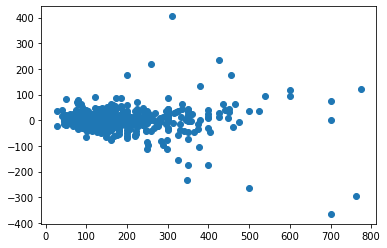

In [50]:
plt.scatter(testing.price_now,testing.di)

In [47]:
toplot = testing[abs(testing.di) > 50][['price','pred','di','price_now']]

In [54]:
toplot[(toplot.price_now.isna())&(toplot.di > 0)]

,price,pred,di,price_now
354,340,255.836592,84.163408,NaN
414,470,166.130410,303.869590,NaN
420,233,175.234744,57.765256,NaN
425,399,185.019760,213.980240,NaN
453,298,189.306831,108.693169,NaN
465,249,197.985685,51.014315,NaN
612,250,186.818935,63.181065,NaN
636,349,248.927965,100.072035,NaN
738,409,285.343380,123.656620,NaN


In [55]:
toplot[(toplot.price_now.isna())&(toplot.di < 0)]

,price,pred,di,price_now
20,171,263.873630,-92.873630,NaN
93,142,197.913474,-55.913474,NaN
118,95,203.356956,-108.356956,NaN
150,125,279.320802,-154.320802,NaN
235,66,151.348391,-85.348391,NaN
284,143,205.484567,-62.484567,NaN
289,190,305.135124,-115.135124,NaN
305,45,151.894578,-106.894578,NaN
417,174,224.788340,-50.788340,NaN
426,70,171.234203,-101.234203,NaN


In [46]:
testing.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'price_now', 'dist_cent', 'bathtub', 'luggagedropoffallowed',
       'hostgreetsyou', 'extrapillowsandblankets', 'patio', 'microwave',
       'privateentrance', 'firstaidkit', 'stove', 'oven', '